In [40]:
import pyforest  #imports all important libraries

In [41]:
net=pd.read_csv("Network Analytics.csv",parse_dates=True)
net

<IPython.core.display.Javascript object>

,Timestamp,OutboundUtilzation
0,10/10/2017 7:01,96.24420
1,10/10/2017 7:21,99.11310
2,10/10/2017 7:26,97.28920
3,10/10/2017 7:31,98.02860
4,10/10/2017 7:36,99.52630
...,...,...
25626,1/8/2018 12:47,4.20296
25627,1/8/2018 12:52,5.22635
25628,1/8/2018 12:57,5.38923
25629,1/8/2018 13:02,35.50460


## Exploratory data analysis

In [3]:
net.isna().sum()

Timestamp             0
OutboundUtilzation    0
dtype: int64

In [4]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           25631 non-null  object 
 1   OutboundUtilzation  25631 non-null  float64
dtypes: float64(1), object(1)
memory usage: 400.6+ KB


In [5]:
net['Timestamp'].unique()

array(['10/10/2017 7:01', '10/10/2017 7:21', '10/10/2017 7:26', ...,
       '1/8/2018 12:57', '1/8/2018 13:02', '1/8/2018 13:07'], dtype=object)

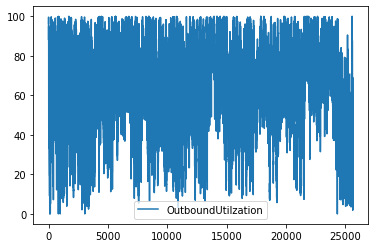

In [7]:
from matplotlib import pyplot
net.plot()
pyplot.show()

## Histogram and density plots

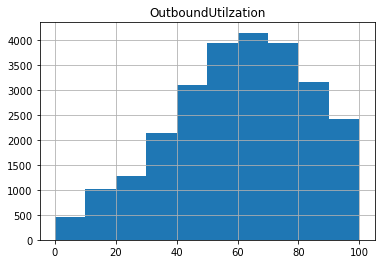

In [8]:
net.hist()
pyplot.show()

## Data driven models

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

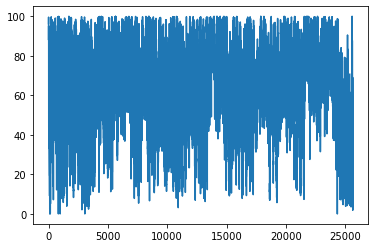

In [10]:
net.OutboundUtilzation.plot()  #outboundutilization coulmn plot

### Splitting data

In [11]:
train=net.head(20000)
test=net.tail(5631)

### Moving average method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

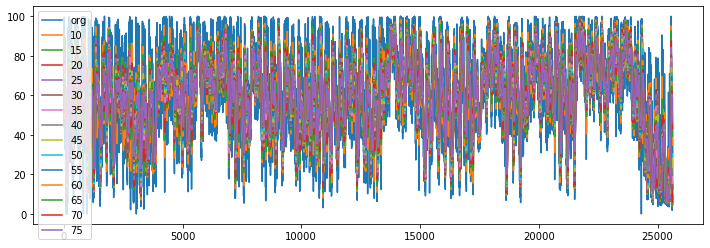

In [12]:
plt.figure(figsize=(12,4))
net.OutboundUtilzation.plot(label='org')
for i in range(10,80,5):
    net.OutboundUtilzation.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')    

### Time series decomposition

<IPython.core.display.Javascript object>

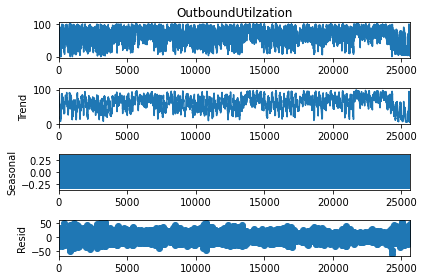

In [13]:
decompose_ts_add=seasonal_decompose(net.OutboundUtilzation,period=12)
decompose_ts_add.plot()
plt.show()

### ACF & PACF plots

<IPython.core.display.Javascript object>

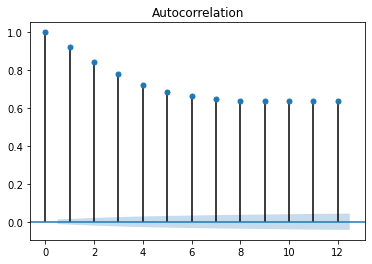

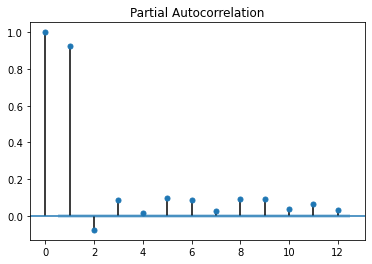

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(net.OutboundUtilzation,lags=12)
tsa_plots.plot_pacf(net.OutboundUtilzation,lags=12)
plt.show()

### Evaluation metric MAPE

In [15]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential method

In [16]:
ses_model=SimpleExpSmoothing(train['OutboundUtilzation']).fit(smoothing_level=0.2)
pred_ses_model=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses_model,test.OutboundUtilzation)

26924.649030678836

### Holt's method

In [17]:
hw_model=Holt(train['OutboundUtilzation']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw_model=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model,test.OutboundUtilzation)

1579877.648352113

### Holts winter exponential smoothing with additive seasonality and additive trend

In [18]:
hw_model_add=ExponentialSmoothing(train['OutboundUtilzation'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hw_model_add=hw_model_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model_add,test.OutboundUtilzation)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


29243.423574452718

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [19]:
hw_model_mul=ExponentialSmoothing(train['OutboundUtilzation'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hw_model_mul=hw_model_mul.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_model_mul,test.OutboundUtilzation)

19675.80726763124

## Final model by combining train and test

In [20]:
hw_model_mul=ExponentialSmoothing(train['OutboundUtilzation'],seasonal='mul',trend='add',seasonal_periods=12).fit()

In [21]:
hw_model_mul.forecast(20)

20000    68.661135
20001    69.777684
20002    69.879906
20003    69.320637
20004    69.516169
20005    69.088696
20006    68.906340
20007    69.444566
20008    68.808959
20009    68.793343
20010    68.640944
20011    68.413767
20012    68.618577
20013    69.734431
20014    69.836587
20015    69.277663
20016    69.473072
20017    69.045861
20018    68.863617
20019    69.401506
dtype: float64

## Model based approach

In [46]:
net=pd.read_csv("Network Analytics.csv")
Timestamp=['jan','feb','mar','apr','may','jun','july','aug','sept','oct','nov','dec']
import numpy as np
p=net["Timestamp"][0]
net['timestamp']=0
for i in range(25631):
    p=net["Timestamp"][i]
    net['Timestamp'][i]
month_dummies=pd.DataFrame(pd.get_dummies(net['Timestamp']))
net1=pd.concat([net,month_dummies],axis=1)

net1['t']=np.arange(1,25632)

net1['t_squared']=net1['t']*net1['t']
net1.columns
net1["log_out"]=np.log(net1['OutboundUtilzation'])
net1.rename(columns={"OutboundUtilzation":"outboundutilzation"},inplace=True)
    
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
net1

,Timestamp,outboundutilzation,timestamp,1/1/2018 0:02,1/1/2018 0:07,1/1/2018 0:12,1/1/2018 0:17,1/1/2018 0:22,1/1/2018 0:27,1/1/2018 0:32,...,12/9/2017 9:27,12/9/2017 9:32,12/9/2017 9:37,12/9/2017 9:42,12/9/2017 9:47,12/9/2017 9:52,12/9/2017 9:57,t,t_squared,log_out
0,10/10/2017 7:01,96.24420,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.566889
1,10/10/2017 7:21,99.11310,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.596262
2,10/10/2017 7:26,97.28920,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.577688
3,10/10/2017 7:31,98.02860,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.585259
4,10/10/2017 7:36,99.52630,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.600422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25626,1/8/2018 12:47,4.20296,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25627,656743129,1.435789
25627,1/8/2018 12:52,5.22635,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25628,656794384,1.653713
25628,1/8/2018 12:57,5.38923,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25629,656845641,1.684403
25629,1/8/2018 13:02,35.50460,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25630,656896900,3.569662


## Heat map

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

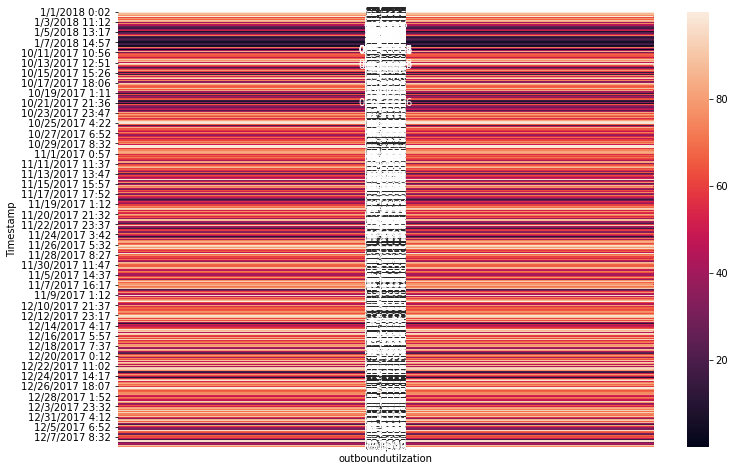

In [24]:
plt.figure(figsize=(12,8))
heatmap=pd.pivot_table(data=net1,values='outboundutilzation',index='Timestamp',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

In [25]:
net1.shape

(25631, 25628)

### Splitting data

In [50]:
train1=net1.head(20000)
test1=net1.tail(5631)

### Linear model

In [48]:
import statsmodels.formula.api as smf

linear_model=smf.ols('outboundutilzation~t',data=train1).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test1['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test1['outboundutilzation'])-np.array(pred_linear))**2))
rmse_linear

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

26.3927680840522

### Exponential model

In [51]:
exp=smf.ols('log_out~t',data=train1).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test1['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test1['outboundutilzation'])-np.array(pred_exp))**2))
rmse_exp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

62.21324156490891

### Quadratic model

In [52]:
quad=smf.ols('outboundutilzation~t+t_squared',data=train1).fit()
pred_quad=pd.Series(quad.predict(test1[['t','t_squared']]))
rmse_quad=np.sqrt(np.mean((np.array(test1['outboundutilzation'])-np.array(pred_quad))**2))
rmse_quad

<IPython.core.display.Javascript object>

26.379085671567857

### Compare the results of all models

In [53]:
data={"MODEL":pd.Series(['rmse_linear','rmse_exp','rmse_quad']),"RMSE_values":pd.Series([rmse_linear,rmse_exp,rmse_quad])}
table_RMSE=pd.DataFrame(data)
table_RMSE.sort_values(['RMSE_values'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,MODEL,RMSE_values
2,rmse_quad,26.379086
0,rmse_linear,26.392768
1,rmse_exp,62.213242


## Predict for new data

In [54]:
predict_new=pd.read_csv("Predict_new (2).csv")  #using a separate dataset for prediction
predict_new

<IPython.core.display.Javascript object>

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [55]:
model_final=smf.ols('outboundutilzation~t',data=train1).fit() #linear model as final model which has least error

In [56]:
predict=pd.Series(linear_model.predict(predict_new)) #final prediction on predict dataset
predict

<IPython.core.display.Javascript object>

0     56.405647
1     56.406039
2     56.406431
3     56.406823
4     56.407215
5     56.407607
6     56.407999
7     56.408391
8     56.408782
9     56.409174
10    56.409566
11    56.409958
dtype: float64